<a href="https://colab.research.google.com/github/Jechu2/Univariate-time-series/blob/main/Webinar_Pronostico_de_Palta_LL_series_time_LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN-LSTM para pronóstico Usando el Método de la Ventana deslizante

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
# RNN-LSTM para predecir producción de palta en región La Libertad
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [3]:
# convertimos un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [4]:
# semilla aleatoria para reproducibilidad
numpy.random.seed(123)
np.random.uniform
tf.random.set_random_seed(123)

**The production main crops of the region La Libertad dataset**
This dataset contains 9 different features such as production of esparrago, maiz, palta, uva, temperature min, temperature max, average temperature, rainfall and RH. These were collected every month, beginning in 2001. This section of the dataset was prepared by Jesús Obregón

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Palta.2019.csv to Palta.2019.csv


In [6]:
import io

In [7]:
%%time
dataframe = read_csv('Palta.2019.csv', usecols=[1], engine='python',
skipfooter=0)
dataset = dataframe.values
dataset = dataset.astype('float64')

CPU times: user 6.5 ms, sys: 625 µs, total: 7.12 ms
Wall time: 17.7 ms


In [8]:
dataframe.head()

,Palta
0,699.0
1,792.0
2,1702.0
3,1371.0
4,1507.0


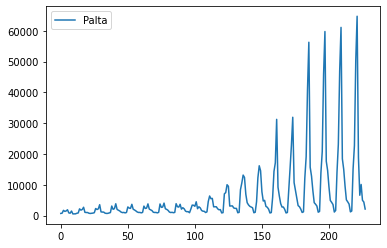

In [9]:
dataframe.plot()

In [10]:
dataframe.describe()

,Palta
count,228.000000
mean,6224.369706
std,10602.508569
min,543.000000
25%,1152.439250
50%,2455.920000
75%,5206.301750
max,64722.440000


In [12]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [13]:
# dividimos entre entranmiento y test
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [14]:
#dataframe.size
train.size, test.size

(159, 69)

In [15]:
# remodelamos X=t y Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX

In [17]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
testX

In [20]:
# creamos la LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 144       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


In [22]:
#training model RNN-LSTM
%%time
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
 - 2s - loss: 0.0014
Epoch 2/100
 - 0s - loss: 0.0013
Epoch 3/100
 - 0s - loss: 0.0012
Epoch 4/100
 - 0s - loss: 0.0012
Epoch 5/100
 - 0s - loss: 0.0011
Epoch 6/100
 - 0s - loss: 0.0010
Epoch 7/100
 - 0s - loss: 9.4415e-04
Epoch 8/100
 - 0s - loss: 8.7620e-04
Epoch 9/100
 - 0s - loss: 8.6117e-04
Epoch 10/100
 - 0s - loss: 8.0476e-04
Epoch 11/100
 - 0s - loss: 7.7539e-04
Epoch 12/100
 - 0s - loss: 7.3678e-04
Epoch 13/100
 - 0s - loss: 7.0112e-04
Epoch 14/100
 - 0s - loss: 6.8741e-04
Epoch 15/100
 - 0s - loss: 6.5830e-04
Epoch 16/100
 - 0s - loss: 6.7538e-04
Epoch 17/100
 - 0s - loss: 6.6264e-04
Epoch 18/100
 - 0s - loss: 6.4354e-04
Epoch 19/100
 - 0s - loss: 6.5939e-04
Epoch 20/100
 - 0s - loss: 6.3510e-04
Epoch 21/100
 - 0s - loss: 6.2127e-04
Epoch 22/100
 - 0s - loss: 6.1935e-04
Epoch 23/100
 - 0s - loss: 6.2425e-04
Epoch 24/100
 - 0s - loss: 5.9761e-04
Epoch 25/100
 - 0s - loss: 5.9270e-04
Epoch 26/100
 - 0s - loss: 5.9462e-04
Epoch 27/100
 - 0s - loss: 6.0138e-04
Epoch 

In [23]:
# hacemos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [24]:
# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [25]:
# calculamos el error rms
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Resultado del test: %.2f RMSE' % (testScore))

Resultado del entrenamiento: 0.02 RMSE
Resultado del test: 0.16 RMSE


In [26]:
testPredict[:,0]

array([0.01833482, 0.07707121, 0.01015952, 0.02221257, 0.02832913,
       0.02034634, 0.00718838, 0.01301552, 0.13388672, 0.24299386,
       0.3122422 , 0.3393907 , 0.03600127, 0.07935709, 0.02361551,
       0.02247906, 0.02652397, 0.01816627, 0.0086822 , 0.01564566,
       0.21080565, 0.29076055, 0.5884862 , 0.52387345, 0.03595063,
       0.08673309, 0.02259905, 0.02803869, 0.02976306, 0.02666443,
       0.00578029, 0.01676985, 0.23706481, 0.31266987, 0.65058196,
       0.50787425, 0.04271976, 0.08215835, 0.02603444, 0.0331729 ,
       0.03375703, 0.03014736, 0.0045321 , 0.02086319, 0.2371012 ,
       0.35586748, 0.6458142 , 0.49580684, 0.04353714, 0.08068409,
       0.02668503, 0.03417267, 0.03478888, 0.03119382, 0.00474258,
       0.01758278, 0.25747985, 0.34089735, 0.70084023, 0.5162533 ,
       0.04334389, 0.05681908, 0.03381038, 0.01825756], dtype=float32)

In [27]:
testY[0]

array([0.08995326, 0.05189791, 0.03483468, 0.03499329, 0.02294816,
       0.00487461, 0.00724469, 0.1157193 , 0.23064848, 0.34668096,
       0.48899973, 0.15838047, 0.11889895, 0.08167101, 0.04208279,
       0.03633329, 0.02411769, 0.00735407, 0.01050149, 0.18099924,
       0.2894053 , 0.62842803, 0.86845099, 0.23624123, 0.19103813,
       0.11791081, 0.05696933, 0.04911183, 0.03977972, 0.00864777,
       0.01256539, 0.20724036, 0.31582809, 0.70711865, 0.92265948,
       0.26635226, 0.22022567, 0.13707458, 0.06825784, 0.05858574,
       0.04766199, 0.00951269, 0.01759458, 0.21091692, 0.35282841,
       0.72331918, 0.94360016, 0.27864001, 0.22603594, 0.14086801,
       0.07119521, 0.06101035, 0.04974194, 0.01030938, 0.01454095,
       0.22741426, 0.34571586, 0.77695287, 1.        , 0.28522203,
       0.09437103, 0.14894567, 0.06883201, 0.06026618])

In [28]:
compara = pd.DataFrame(np.array([testY[0], testPredict[:,0]])).transpose()
compara.columns = ['test', 'prediccions']
compara.tail()

,test,prediccions
59,0.285222,0.516253
60,0.094371,0.043344
61,0.148946,0.056819
62,0.068832,0.033810
63,0.060266,0.018258


In [29]:
#coeficiente de correlacion
compara.corr(method="pearson")

,test,prediccions
test,1.000000,0.841389
prediccions,0.841389,1.000000


In [30]:
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [31]:
# predicciones del test de cambio para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

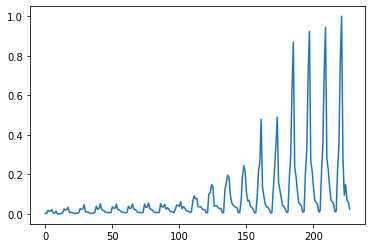

In [32]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))

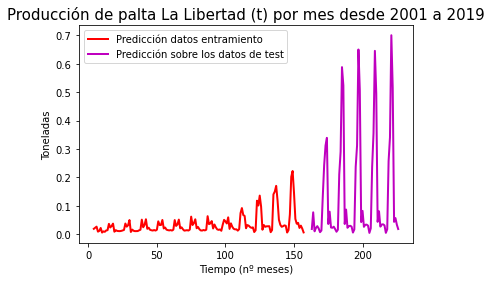

In [33]:
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Predicción datos entramiento', 'Predicción sobre los datos de test'), loc = 'upper left')
plt.grid(False)
plt.title("Producción de palta La Libertad (t) por mes desde 2001 a 2019", fontsize = 15)
plt.xlabel("Tiempo (nº meses)", fontsize = 10)
plt.ylabel("Toneladas", fontsize = 10)
plt.show()

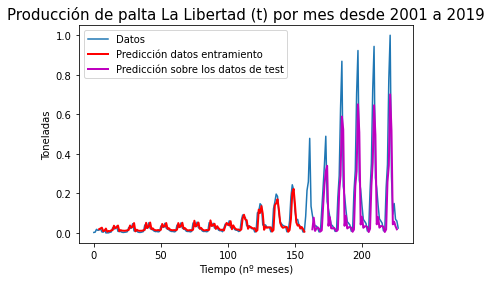

In [34]:
# ploteamos linea base y predicciones
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Predicción datos entramiento', 'Predicción sobre los datos de test'), loc = 'upper left')
plt.grid(False)
plt.title("Producción de palta La Libertad (t) por mes desde 2001 a 2019", fontsize = 15)
plt.xlabel("Tiempo (nº meses)", fontsize = 10)
plt.ylabel("Toneladas", fontsize = 10)
plt.show()

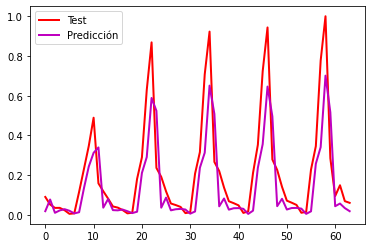

In [35]:
# ploteamos linea base y predicciones
plt.plot(compara['test'], 'r', linewidth = 2)
plt.plot(compara['prediccions'],'m', linewidth = 2)
plt.legend( ('Test', 'Predicción'), loc = 'upper left')
plt.grid(False)
plt.show()